In [1]:
g = Import["projection_job(Grouped_log(128)).graphml"];

Graph[<317>, <34218>]
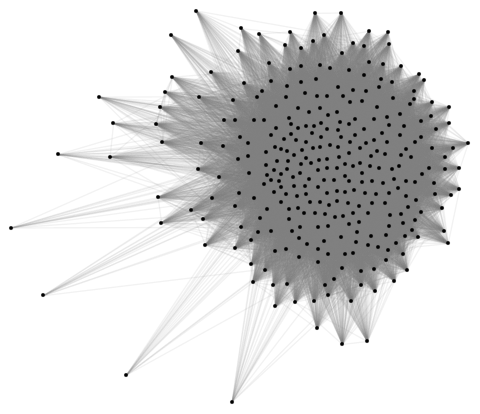

In [2]:
graph = Graph[g, VertexStyle -> Black, VertexSize -> Large, EdgeStyle -> Directive[Gray, Opacity[0.1]]]

In [378]:
Export["projection_job.svg", graph]

projection_job.svg

-Graphics-
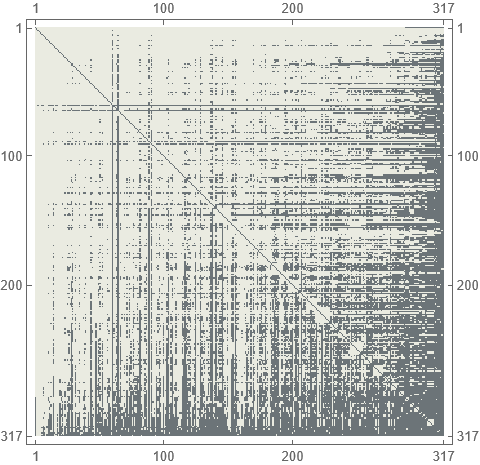

In [185]:
adj = AdjacencyMatrix[g];
MatrixPlot[adj, ColorFunction -> "GrayTones", Frame -> True]

Graph[<317>, <34218>]
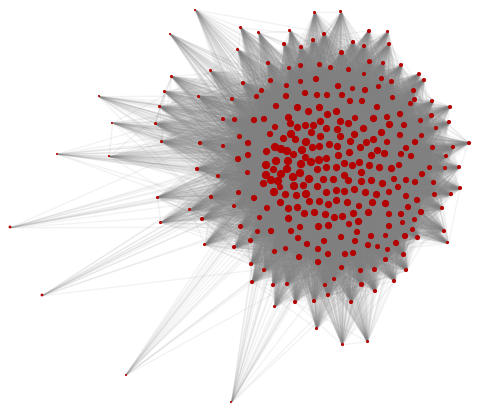

In [379]:
nodes = VertexList[graph];
centrality = DegreeCentrality[graph];

topIndices = Reverse@Ordering[centrality];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
degree = Grid[topNodos, Frame -> All];

a = HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]

In [385]:
Export["deg.svg", a]

deg.svg

-Graphics-
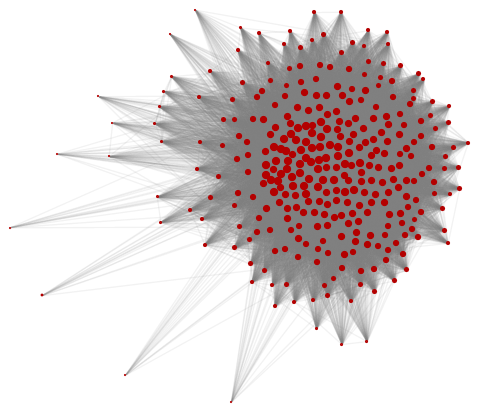

In [402]:
centrality = EigenvectorCentrality[graph];

topIndices = Reverse@Ordering[centrality];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
eigenvector = Grid[Prepend[topNodos, {"Nodo", "Centralidad"}], Frame -> All];

b = GraphPlot[HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]]

In [407]:
Export["eig.svg", b]

eig.svg

-Graphics-
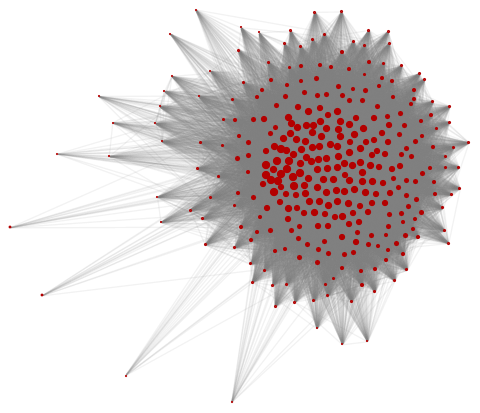

In [408]:
centrality = ClosenessCentrality[graph];

topIndices = Reverse@Ordering[centrality];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
closeness = Grid[Prepend[topNodos, {"Nodo", "Centralidad"}], Frame -> All];

c = GraphPlot[HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]]

In [413]:
Export["clos.svg", c]

clos.svg

-Graphics-
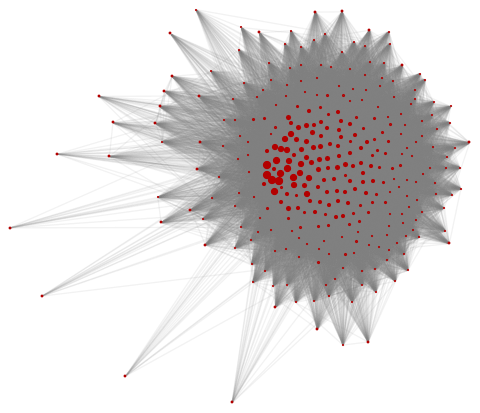

In [415]:
centrality = BetweennessCentrality[graph];

topIndices = Reverse@Ordering[centrality];
topNodos = Table[{nodes[[i]], centrality[[i]]}, {i, topIndices}];
betweenness = Grid[Prepend[topNodos, {"Nodo", "Centralidad"}], Frame -> All];

d = GraphPlot[HighlightGraph[graph, nodes, 
 VertexSize -> Thread[nodes -> Rescale[centrality]]]]

In [420]:
Export["bet.svg", d]

bet.svg

In [269]:
N[GraphAssortativity[graph]]

-0.294863

-Graphics-
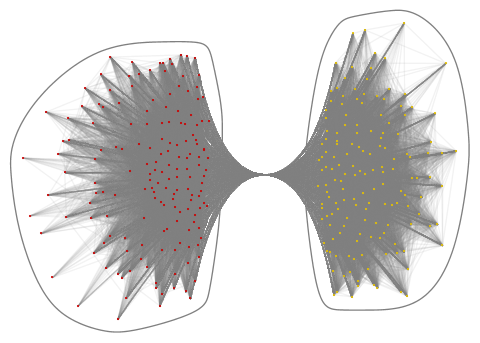

In [398]:
community = FindGraphCommunities[graph];
gC = CommunityGraphPlot[graph, community]

In [400]:
Export["commun.svg", gC]

commun.svg

In [265]:
communities = FindGraphCommunities[g];

com1 = communities[[1]];
com2 = communities[[2]];

N[GraphAssortativity[g, {com1, com2}]]

0.0562271

In [ ]:
unno = RandomSample[community[[1]], 10];
doos = RandomSample[community[[2]], 10];

-Graphics-
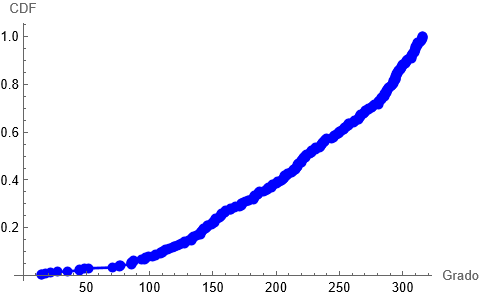

In [51]:
sorted = Sort[VertexDegree[graph]];
n = Length[sorted];
cdfData = Table[{sorted[[i]], i/n}, {i, n}];

ListPlot[cdfData, Joined -> True, 
 AxesLabel -> {"Grado", "CDF"}, 
 PlotMarkers -> Automatic, PlotStyle -> Blue]

-Graphics-
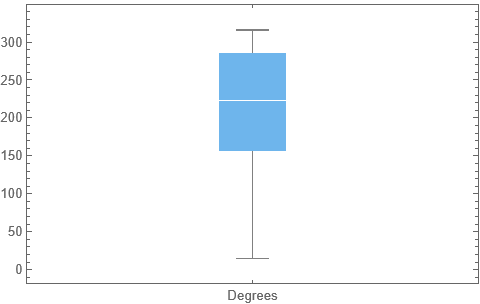

In [55]:
box = BoxWhiskerChart[VertexDegree[graph], 
 ChartLabels -> {"Degrees"}, 
 ChartStyle -> "Pastel"]

In [56]:
grados = VertexDegree[graph];

Min[grados]         (* Grado mínimo *)
Max[grados]         (* Grado máximo *)
N[Mean[grados]]        (* Media *)
Median[grados]      (* Mediana *)
First[Commonest[grados]]   (* Moda: valor(es) más frecuente(s) *)
N[StandardDeviation[grados]]  (* Desviación estándar *)
Quantile[grados, 0.25]  (* Q1 *)
Quantile[grados, 0.75]  (* Q3 *)

15
316
215.886
223
294
74.8815
157
286

-Graphics-
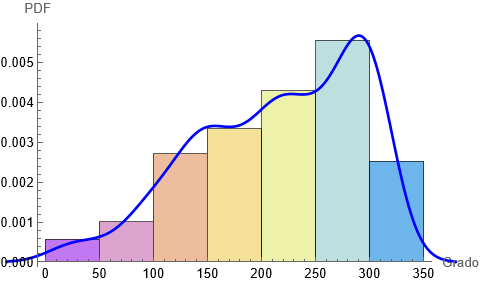

In [65]:
h = Show[
  Histogram[grados, Automatic, "PDF", ChartStyle -> "Pastel", AxesLabel -> {"Grado", "PDF"}],
  SmoothHistogram[grados, PlotStyle -> {Thick, Blue}]
]